In [ ]:
!pip install tsfresh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade matrixprofile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matrixprofile-1.1.10.tar.gz (331 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install matrixprofile-ts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
TBI_Pos = '/content/drive/MyDrive/TBI-Pos'
TBI_Neg = '/content/drive/MyDrive/TBI-Neg'

In [ ]:
import numpy as np
import pandas as pd
from matrixprofile import *
from tsfresh import extract_features
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from torch.utils.data import ConcatDataset

In [ ]:
!pip install matrixprofilets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matrixprofilets (from versions: none)
ERROR: No matching distribution found for matrixprofilets


In [ ]:
from matrixprofile import matrixProfile
from stumpy import *
import stumpy
from stumpy import stump


In [ ]:
from matrixprofile import matrixProfile as mp


In [ ]:
max_length = 0

# Load TBI-Neg data
neg_data = []
neg_labels = []
for filename in os.listdir(TBI_Neg):
    filepath = os.path.join(TBI_Neg, filename)
    df = pd.read_csv(filepath)
    mp = matrixProfile.stomp(df.values.flatten(), m=5) 
    print(mp)
    if len(mp) > max_length:
        max_length = len(mp)
    neg_data.append(mp)

    neg_labels.append(0)
    print(neg_data, neg_labels)

(array([0.08503459, 0.07085338, 0.10566037, ..., 0.05481083, 0.06774273,
       0.04282805]), array([ 26032.,  99545., 100742., ...,  57477.,  19032.,  34479.]))
[(array([0.08503459, 0.07085338, 0.10566037, ..., 0.05481083, 0.06774273,
       0.04282805]), array([ 26032.,  99545., 100742., ...,  57477.,  19032.,  34479.]))] [0]
(array([0.03957864, 0.09551832, 0.05164751, ..., 0.11211419, 0.0565897 ,
       0.05443408]), array([103897., 103898.,  82822., ...,  97047.,  48980.,  28746.]))
[(array([0.08503459, 0.07085338, 0.10566037, ..., 0.05481083, 0.06774273,
       0.04282805]), array([ 26032.,  99545., 100742., ...,  57477.,  19032.,  34479.])), (array([0.03957864, 0.09551832, 0.05164751, ..., 0.11211419, 0.0565897 ,
       0.05443408]), array([103897., 103898.,  82822., ...,  97047.,  48980.,  28746.]))] [0, 0]
(array([0.0675242 , 0.10916261, 0.07049579, ..., 0.11052128, 0.10444297,
       0.03897176]), array([ 82343.,  22134.,  15938., ..., 101296., 104439.,   1791.]))
[(array([0.0

In [ ]:
max_length =0

pos_data = []
pos_labels = []
for filename in os.listdir(TBI_Pos):
    filepath = os.path.join(TBI_Pos, filename)
    df = pd.read_csv(filepath)
    mp = matrixProfile.stomp(df.values.flatten(), m=5) 
    if len(mp) > max_length:
        max_length = len(mp)
    pos_data.append(mp)
    pos_labels.append(1)
    print(pos_data,pos_labels)

[(array([0.01772407, 0.0788895 , 0.0697209 , ..., 0.06057048, 0.07950313,
       0.10134118]), array([46174., 73007., 22121., ...,   153., 35927., 77537.]))] [1]
[(array([0.01772407, 0.0788895 , 0.0697209 , ..., 0.06057048, 0.07950313,
       0.10134118]), array([46174., 73007., 22121., ...,   153., 35927., 77537.])), (array([0.06939524, 0.01754455, 0.09902212, ..., 0.09007474, 0.02757584,
       0.0492817 ]), array([97244., 21431., 34701., ..., 63236., 37669., 86672.]))] [1, 1]
[(array([0.01772407, 0.0788895 , 0.0697209 , ..., 0.06057048, 0.07950313,
       0.10134118]), array([46174., 73007., 22121., ...,   153., 35927., 77537.])), (array([0.06939524, 0.01754455, 0.09902212, ..., 0.09007474, 0.02757584,
       0.0492817 ]), array([97244., 21431., 34701., ..., 63236., 37669., 86672.])), (array([0.07507163, 0.05566132, 0.06410326, ..., 0.0563021 , 0.05026278,
       0.09156955]), array([   175.,  37307., 102320., ...,  24792.,  28230.,  22648.]))] [1, 1, 1]
[(array([0.01772407, 0.07888

In [ ]:

data = np.concatenate([neg_data, pos_data], axis=0)
labels = np.concatenate([neg_labels, pos_labels], axis=0)

In [ ]:
print('total data:',len(data))
print('total predictions',len(labels))


total data: 36
total predictions 36


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)
train_data_reshaped = np.array(train_data).reshape(len(train_data), -1)
test_data_reshaped = np.array(test_data).reshape(len(test_data), -1)


In [ ]:
print('training data is:', len(train_data))
print('testing data is:',len(test_data))

training data is: 28
testing data is: 8


In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(train_data_reshaped, train_labels)

RandomForestClassifier(random_state=42)

In [ ]:
pred_labels = rfc.predict(test_data_reshaped)
score = rfc.score(test_data_reshaped, test_labels)
print('Accuracy:', score)

Accuracy: 0.625


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, mean_squared_error

In [ ]:
accuracy = accuracy_score(test_labels, pred_labels)
recall = recall_score(test_labels, pred_labels)
f1 = f1_score(test_labels, pred_labels)
conf_mat = confusion_matrix(test_labels, pred_labels)
mse = mean_squared_error(test_labels, pred_labels)
test_err_rate = 1 - accuracy

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_mat)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Test Error Rate: {test_err_rate:.4f}")

Accuracy: 0.6250
Recall: 0.6667
F1 Score: 0.7273
Confusion Matrix:
[[1 1]
 [2 4]]
Mean Squared Error: 0.3750
Test Error Rate: 0.3750


In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.80      0.67      0.73         6

    accuracy                           0.62         8
   macro avg       0.57      0.58      0.56         8
weighted avg       0.68      0.62      0.65         8



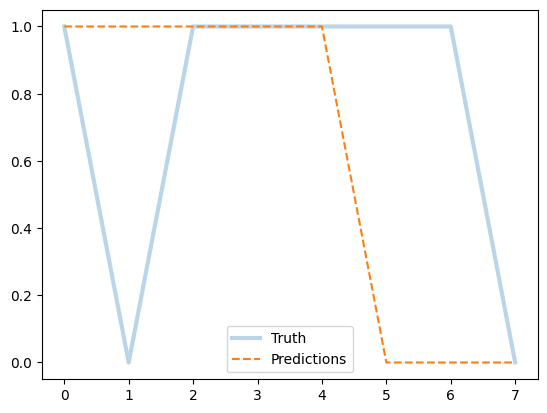

In [ ]:
plt.plot(test_labels, lw=3, alpha=0.3, label='Truth')
plt.plot(pred_labels, '--', label='Predictions')
plt.legend(loc='best')
print(classification_report(test_labels, pred_labels))

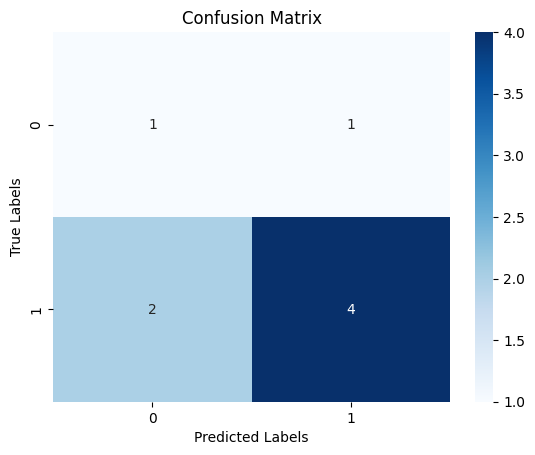

In [ ]:
sns.heatmap(conf_mat, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from joblib import dump, load

In [ ]:
dump(rfc, 'rfc_model.joblib')

['rfc_model.joblib']

In [ ]:
rf = load('rfc_model.joblib')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/205-DOD-tts_all.csv')